# RNA Velocity Data

In [1]:
# default_exp datasets

RNA velocity is a high-dimensional vector that predicts the future state of individual cells on a timescale of hours. Authors of RNA Velocity expect it to greatly aid the analysis of developmental lineages and cellular dynamics, particularly in humans.

In this notebook, we have single-cell datasets with RNA velocity information. Functions return 2 $n \times d$ torch tensors and a list. The first tensor contains information of $n$ cells with $d$ features and the second tensor holds the vectors associated with the aforementioned $n$ cells in the same $d$ directions. The list contains the ground truth cell type labels of each of the $n$ cells.

## Pancreas Dataset

### Functions to Return RNA Velocity Dataset

In [2]:
#export

import scvelo as scv
import numpy as np
import torch
import scipy

def pancreas_rnavelo_load_data():
    # load data
    adata = scv.datasets.pancreas()
    
    #preprocess data and calculate rna velocity
    scv.pp.filter_and_normalize(adata)
    scv.pp.moments(adata)
    scv.tl.velocity(adata, mode='stochastic')
    
    return adata
        
def add_labels_pancreas(clusters):
    cluster_set = set(clusters)
    d = {}
    count = 0
    for c in cluster_set:
        d[c] = count
        count +=1
    labels = []
    for i in range(len(clusters)):
        labels.append(d[clusters[i]])
        
    return labels

def pancreas_rnavelo():
    # load preprocessed data
    adata = pancreas_rnavelo_load_data()
    
    # set datapoints (X) and flows
    X = torch.tensor(adata.X.todense())
    flows = torch.tensor(adata.layers["velocity"])
    labels = add_labels_pancreas(adata.obs["clusters"])
        
    return X, flows, labels

def pancreas_rnavelo_50pcs():
    adata = pancreas_rnavelo_load_data()
    
    # calculate velocity pca (50 dimensions) and display pca plot (2 dimensions)
    scv.tl.velocity_graph(adata)
    scv.pl.velocity_embedding_stream(adata, basis='pca')
    
    X = torch.tensor(adata.obsm["X_pca"])
    flows = torch.tensor(adata.obsm["velocity_pca"])
    labels = add_labels_pancreas(adata.obs["clusters"])
    
    return X, flows, labels

### Function Checks

In [3]:
X, flows, labels = pancreas_rnavelo()

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:18) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:10) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:26) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:09) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:26) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/36 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


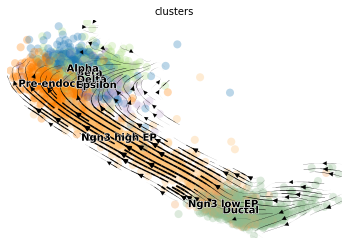

In [4]:
X2, flows2, labels2 = pancreas_rnavelo_50pcs()

In [5]:
print(X2.shape)
print(flows2.shape)
print(len(labels2))

print(X2.shape)
print(flows2.shape)
print(len(labels2))

torch.Size([3696, 50])
torch.Size([3696, 50])
3696
torch.Size([3696, 50])
torch.Size([3696, 50])
3696


In [6]:
!nbdev_build_lib

Converted 00 Core.ipynb.
Converted 01 Datasets.ipynb.
Converted 01a01 Graph Toy Datasets.ipynb.
Converted 01a01a Small Random Directed Graphs.ipynb.
Converted 01a02 Manifold Toy Datasets.ipynb.
Converted 01a02a Polar 1-Manifold Toy Datasets.ipynb.
Converted 01a02b Polar 2-Manifold Toy Datasets.ipynb.
Converted 01b01 Synthetic Single-Cell Data.ipynb.
Converted 01b02 Single-Cell Data and RNA Velocity.ipynb.
Converted 01c Plotting Utils.ipynb.
Converted 02 Data Preprocessing.ipynb.
Converted 02a Flashlight Kernel.ipynb.
Converted 02b Diffusion Maps.ipynb.
Converted 02c Flow Neighborhoods.ipynb.
Converted index.ipynb.
